In [1]:
!pip install shap

!pip install numpy pandas matplotlib requests tqdm opencv-python pillow shap tensorflow keras -i https://pypi.tuna.tsinghua.edu

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 157.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 215.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 166.7 MB/s eta 0:00:00a 0:00:01
Looking in indexes: https://pypi.tuna.tsinghua.edu
Could not fetch URL https://pypi.tuna.tsinghua.edu/typing-extensions/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.tuna.tsinghua.edu', port=443): Max retries exceeded with url: /typing-extensions/ (Caused by SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1007)'))) - skipping
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
Could not fetch URL https://pypi.tuna.tsinghua.edu/tensorflow/: There was a problem confirming the ssl certificate:

In [2]:
!pip install numpy pandas matplotlib requests tqdm opencv-python pillow shap tensorflow keras

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.8.0
    Uninstalling typing_extensions-4.8.0:
      Successfully uninstalled typing_extensions-4.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastapi 0.104.1 requires typing-extensions>=4.8.0, but you have typing-extensions 4.5.0 which is incompatible.
pydantic 2.4.2 requires typing-extensions>=4.6.1, but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.10.1 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.


In [3]:
!pip install numpy pandas matplotlib requests tqdm opencv-python pillow shap tensorflow keras

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [4]:
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [5]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, https://download.pytorch.org/whl/cu113


In [6]:
import os

In [7]:
import torch, torchvision
from torchvision import datasets, transforms
from torch import nn, optim
from torch.nn import functional as F

import numpy as np
import shap

In [8]:
import json
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
import shap

# 有 GPU 就用 GPU，没有就用 CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('device', device)

device cuda:0


In [9]:
model = torch.load('checkpoint/best-0.873.pth')
model = model.eval().to(device)

In [10]:
idx_to_labels = np.load('idx_to_labels.npy', allow_pickle=True).item()
idx_to_labels

{0: 'alligator apple',
 1: 'apple',
 2: 'avocado',
 3: 'banana',
 4: 'barberry',
 5: 'bayberry',
 6: 'bell pepper',
 7: 'black berry',
 8: 'black cherry',
 9: 'blueberry',
 10: 'bottle gourd',
 11: 'cantaloupe',
 12: 'carambola',
 13: 'cherry',
 14: 'coconut',
 15: 'corn kernel',
 16: 'custard apple',
 17: 'dragonfruit',
 18: 'durian',
 19: 'eggplant',
 20: 'fig',
 21: 'grape',
 22: 'jackfruit',
 23: 'jalapeno',
 24: 'kiwi',
 25: 'lemon',
 26: 'lime',
 27: 'longan',
 28: 'macadamia',
 29: 'mango',
 30: 'orange',
 31: 'papaya',
 32: 'pea',
 33: 'peanut',
 34: 'pear',
 35: 'persimmon',
 36: 'pineapple',
 37: 'pomegranate',
 38: 'pumpkin',
 39: 'saguaro',
 40: 'strawberry',
 41: 'tomato',
 42: 'watermelon',
 43: 'zucchini'}

In [11]:
class_names = list(idx_to_labels.values())
class_names

['alligator apple',
 'apple',
 'avocado',
 'banana',
 'barberry',
 'bayberry',
 'bell pepper',
 'black berry',
 'black cherry',
 'blueberry',
 'bottle gourd',
 'cantaloupe',
 'carambola',
 'cherry',
 'coconut',
 'corn kernel',
 'custard apple',
 'dragonfruit',
 'durian',
 'eggplant',
 'fig',
 'grape',
 'jackfruit',
 'jalapeno',
 'kiwi',
 'lemon',
 'lime',
 'longan',
 'macadamia',
 'mango',
 'orange',
 'papaya',
 'pea',
 'peanut',
 'pear',
 'persimmon',
 'pineapple',
 'pomegranate',
 'pumpkin',
 'saguaro',
 'strawberry',
 'tomato',
 'watermelon',
 'zucchini']

In [12]:
img_path = 'test_img/fruitpicture.jpg'
# img_path = 'Fruit-Project_split/test/bottle gourd/133.jpg'
img_pil = Image.open(img_path)
X = torch.Tensor(np.array(img_pil)).unsqueeze(0)
X.shape

torch.Size([1, 3024, 4032, 3])

In [13]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

def nhwc_to_nchw(x: torch.Tensor) -> torch.Tensor:
    if x.dim() == 4:
        x = x if x.shape[1] == 3 else x.permute(0, 3, 1, 2)
    elif x.dim() == 3:
        x = x if x.shape[0] == 3 else x.permute(2, 0, 1)
    return x

def nchw_to_nhwc(x: torch.Tensor) -> torch.Tensor:
    if x.dim() == 4:
        x = x if x.shape[3] == 3 else x.permute(0, 2, 3, 1)
    elif x.dim() == 3:
        x = x if x.shape[2] == 3 else x.permute(1, 2, 0)
    return x 
        

transform= [
    transforms.Lambda(nhwc_to_nchw),
    transforms.Resize(224),
    transforms.Lambda(lambda x: x*(1/255)),
    transforms.Normalize(mean=mean, std=std),
    transforms.Lambda(nchw_to_nhwc),
]

inv_transform= [
    transforms.Lambda(nhwc_to_nchw),
    transforms.Normalize(
        mean = (-1 * np.array(mean) / np.array(std)).tolist(),
        std = (1 / np.array(std)).tolist()
    ),
    transforms.Lambda(nchw_to_nhwc),
]

transform = torchvision.transforms.Compose(transform)
inv_transform = torchvision.transforms.Compose(inv_transform)

In [14]:
def predict(img: np.ndarray) -> torch.Tensor:
    img = nhwc_to_nchw(torch.Tensor(img)).to(device)
    output = model(img)
    return output
def predict(img):
    img = nhwc_to_nchw(torch.Tensor(img)).to(device)
    output = model(img)
    return output

In [15]:
Xtr = transform(X)
out = predict(Xtr[0:1])
out.shape

The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).


torch.Size([1, 44])

In [16]:
classes = torch.argmax(out, axis=1).detach().cpu().numpy()
print(f'Classes: {classes}: {np.array(class_names)[classes]}')

Classes: [25]: ['lemon']


In [17]:
input_img = Xtr[0].unsqueeze(0)
input_img.shape

torch.Size([1, 224, 298, 3])

In [18]:
batch_size = 50

n_evals = 5000

masker_blur = shap.maskers.Image("blur(64, 64)", Xtr[0].shape)

explainer = shap.Explainer(predict, masker_blur, output_names=class_names)

# only one

In [27]:
shap_values = explainer(input_img, max_evals=n_evals, batch_size=batch_size, outputs=[10])

PartitionExplainer explainer: 2it [00:30, 31.00s/it]               


In [28]:
shap_values.data = inv_transform(shap_values.data).cpu().numpy()[0]
shap_values.values = [val for val in np.moveaxis(shap_values.values[0],-1, 0)] 

In [29]:
shap_values.data.shape

(232, 224, 3)

In [30]:
shap_values.values[0].shape

(232, 224, 3)

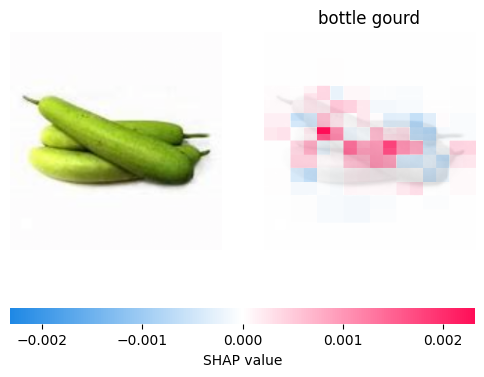

In [31]:
shap.image_plot(shap_values=shap_values.values,
                pixel_values=shap_values.data,
                labels=shap_values.output_names)

In [19]:

shap_values = explainer(input_img, max_evals=n_evals, batch_size=batch_size, outputs=[30, 1, 25])


PartitionExplainer explainer: 2it [00:15, 15.40s/it]               


In [20]:
shap_values.data = inv_transform(shap_values.data).cpu().numpy()[0] 
shap_values.values = [val for val in np.moveaxis(shap_values.values[0],-1, 0)]

In [21]:
shap_values.shape

(3, 224, 298, 3)

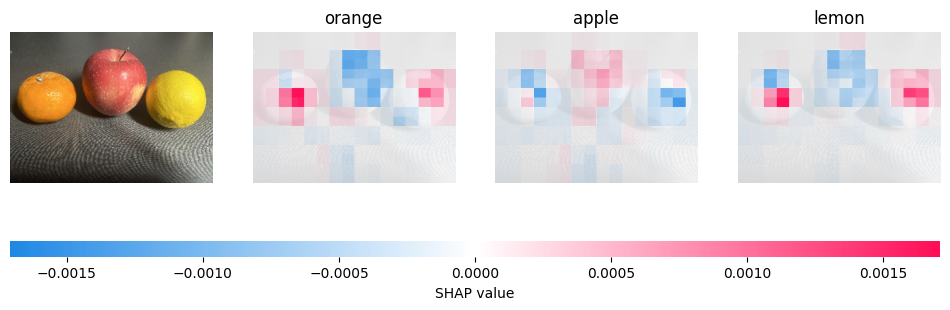

In [22]:
shap.image_plot(shap_values=shap_values.values,
                pixel_values=shap_values.data,
                labels=shap_values.output_names)

# First K projections

In [23]:
topk = 2
shap_values = explainer(input_img, max_evals=n_evals, batch_size=batch_size, outputs=shap.Explanation.argsort.flip[:topk])

PartitionExplainer explainer: 2it [00:13, 13.18s/it]               


In [24]:
shap_values.shape

(1, 224, 298, 3, 2)

In [25]:
shap_values.data = inv_transform(shap_values.data).cpu().numpy()[0]
shap_values.values = [val for val in np.moveaxis(shap_values.values[0],-1, 0)]

In [26]:
len(shap_values.values)

2

In [27]:
shap_values.values[0].shape

(224, 298, 3)

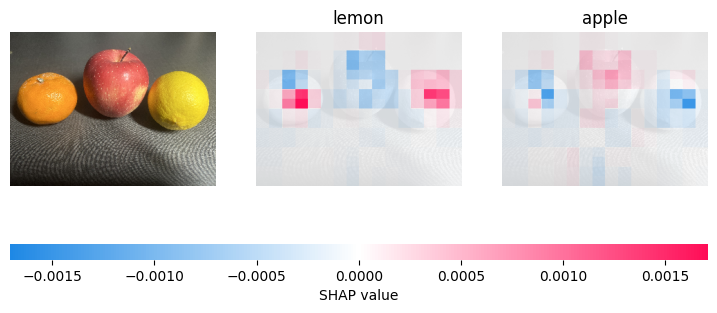

In [28]:
shap.image_plot(shap_values=shap_values.values,
                pixel_values=shap_values.data,
                labels=shap_values.output_names
                )